In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  object 
 4   attribute_1     20775 non-null  object 
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20446 non-null  float64
 11  measurement_4   20366 non-null  float64
 12  measurement_5   20267 non-null  float64
 13  measurement_6   20151 non-null  float64
 14  measurement_7   20055 non-null  float64
 15  measurement_8   19929 non-null  float64
 16  measurement_9   19871 non-null  float64
 17  measurement_10  19708 non-null 

In [125]:
train.shape

(26570, 26)

In [126]:
train.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [127]:
train.columns.groupby(train.dtypes)

{int64: ['id', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2', 'failure'], float64: ['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'], object: ['product_code', 'attribute_0', 'attribute_1']}

In [128]:
train.drop(['product_code', 'attribute_0', 'attribute_1'],axis = 1,inplace=True)

In [129]:
train.columns.groupby(train.dtypes)

{int64: ['id', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2', 'failure'], float64: ['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']}

In [130]:
def fill_na(dataframe):
    for i in dataframe.columns:
        dataframe[i].fillna(dataframe[i].mean(),inplace = True)
        dataframe.drop(["id"],axis = 1)
    return dataframe

In [131]:
train = fill_na(train)

In [132]:
train.isnull().sum()

id                0
loading           0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

In [133]:
y_train = train["failure"]
x_train = train.drop(["failure"],axis = 1)

In [134]:
id = test["id"]

In [135]:
test.columns.groupby(test.dtypes)

{int64: ['id', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2'], float64: ['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'], object: ['product_code', 'attribute_0', 'attribute_1']}

In [136]:
test.drop( ['product_code', 'attribute_0', 'attribute_1'],axis = 1,inplace=True)

In [137]:
test.isnull().values.any()

True

In [138]:
test = fill_na(test)

In [139]:
test.isnull().values.any()

False

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [149]:
xgb_model = RandomForestClassifier().fit(x_train,y_train)

In [150]:
y_pred = xgb_model.predict(test)

In [155]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

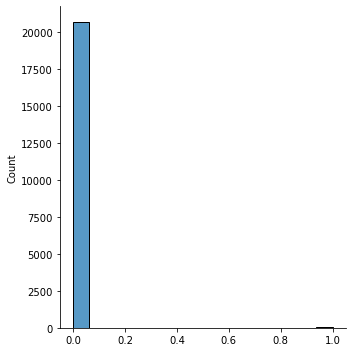

In [156]:
sns.displot(y_pred);

In [157]:
df = pd.DataFrame({
    "id": id,
    "failure": y_pred
})

In [158]:
df.to_csv("sample_submission.csv",index=True)